 Best Month (highest total sales): Jul
 Best Product (highest yearly sales): Product_A
Best Quarter: 2025Q3


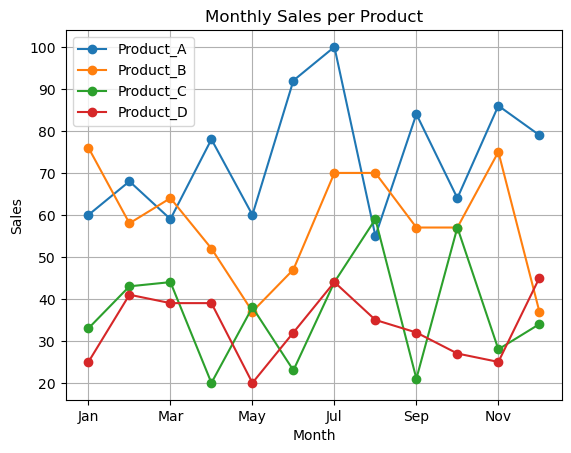

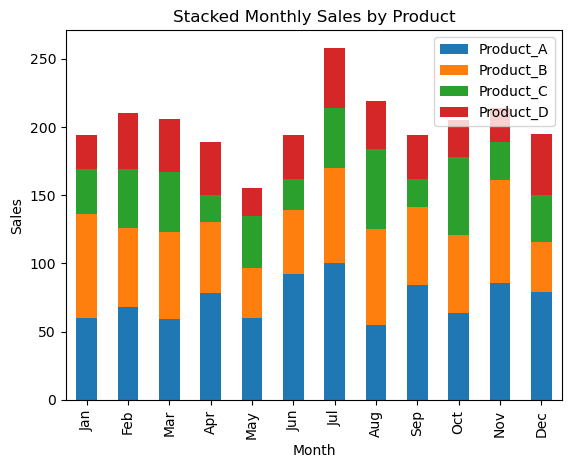

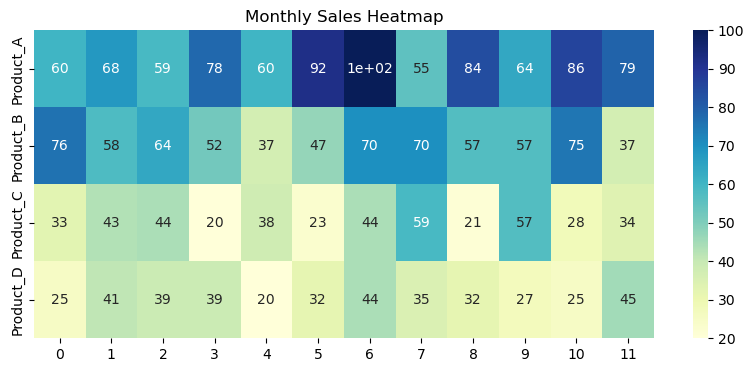

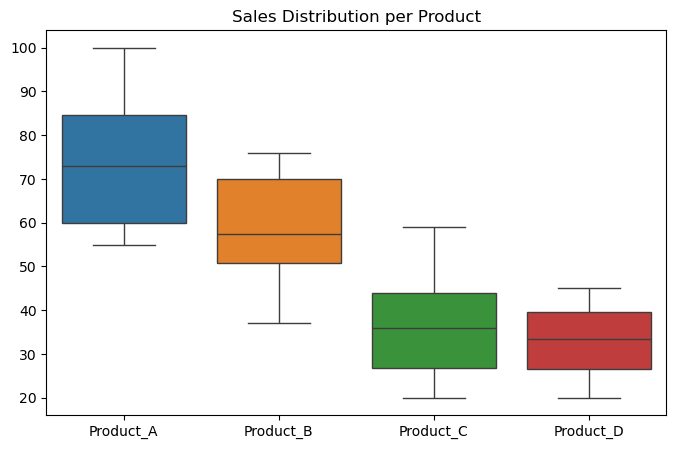

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import generate_random_sales



dates = pd.date_range('2025-01-01', '2025-12-01', freq='MS')


product_A = generate_random_sales(50, 100, 12)
product_B = generate_random_sales(30, 80, 12)
product_C = generate_random_sales(20, 60, 12)
product_D = generate_random_sales(10, 50, 12)


df_initial = pd.DataFrame({
    'Date': dates,
    'Product_A': product_A,
    'Product_B': product_B,
    'Product_C': product_C,
    'Product_D': product_D
})


df_initial.to_csv('data/initial.csv', index=False)

df_initial

df = df_initial.copy()


df['Month'] = df['Date'].dt.strftime('%b')

df['Total_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)


df['Average_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)


df['Month_over_Month_Growth'] = df['Total_Sales'].pct_change().fillna(0) * 100


df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)


df['Max_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmax(axis=1)
df['Min_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmin(axis=1)


df.to_csv('data/final.csv', index=False)

df

pivot_avg = df.pivot_table(
    index='Quarter',
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Total_Sales'],
    aggfunc='mean'
)


total_per_quarter = df.groupby('Quarter')['Total_Sales'].sum()


output = pd.concat([pivot_avg, total_per_quarter.rename('Quarter_Total')], axis=1)


output.to_csv('data/output.csv')

output
best_month = df.loc[df['Total_Sales'].idxmax(), 'Month']
best_product = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum().idxmax()
best_quarter = df.groupby('Quarter')['Total_Sales'].sum().idxmax()

print(" Best Month (highest total sales):", best_month)
print(" Best Product (highest yearly sales):", best_product)
print("Best Quarter:", best_quarter)
df.plot(x='Month', y=['Product_A', 'Product_B', 'Product_C', 'Product_D'], marker='o')
plt.title("Monthly Sales per Product")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

df.set_index('Month')[['Product_A','Product_B','Product_C','Product_D']].plot(
    kind='bar',
    stacked=True
)
plt.title("Stacked Monthly Sales by Product")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(10, 4))
sns.heatmap(df[['Product_A','Product_B','Product_C','Product_D']].T, cmap='YlGnBu', annot=True)
plt.title("Monthly Sales Heatmap")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Product_A','Product_B','Product_C','Product_D']])
plt.title("Sales Distribution per Product")
plt.show()

